Mean Squared Error (Linear Regression): 0.7091157771765548
Mean Squared Error (Ridge Regression): 0.709115422882791
Mean Squared Error (Lasso Regression): 0.9645214205063811


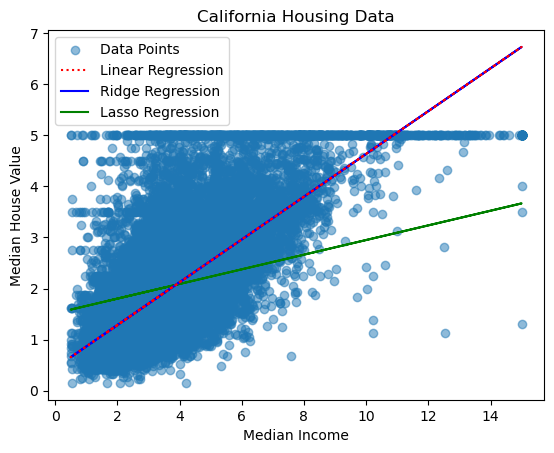

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error

california_housing = fetch_california_housing()
data = pd.DataFrame(data=california_housing.data, columns=california_housing.feature_names)
data['target'] = california_housing.target


plt.scatter(data['MedInc'], data['target'], alpha=0.5, label='Data Points')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('California Housing Data')


X = data[['MedInc']]
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

plt.plot(X_test, y_pred_linear, color='red', linestyle='dotted', label='Linear Regression', zorder=3)
plt.plot(X_test, y_pred_ridge, color='blue', label='Ridge Regression', zorder=2)
plt.plot(X_test, y_pred_lasso, color='green', label='Lasso Regression', zorder=1)

plt.legend()

mse_linear = mean_squared_error(y_test, y_pred_linear)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

print("Mean Squared Error (Linear Regression):", mse_linear)
print("Mean Squared Error (Ridge Regression):", mse_ridge)
print("Mean Squared Error (Lasso Regression):", mse_lasso)

plt.show()
